In [1]:
import cv2
import os
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from skimage.feature import hog
from sklearn.model_selection import GridSearchCV

In [2]:
# 1. Charger les images
image_dir_1 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Train/hyundai"
image_dir_2 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Train/mercedes"
image_dir_3 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Train/mazda"
image_dir_4 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Train/volkswagen"
image_dir_5 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Train/toyota"


images = []
labels = []

def read_data(images_dir , category ):
    global images,labels
    for filename in os.listdir(images_dir):
        if filename.endswith(".jpg"):
            img = cv2.imread(os.path.join(images_dir, filename))
            label = category  # label est le nom de la marque de la voiture
            images.append(img)
            labels.append(label)

read_data(image_dir_1 , "hyundai" )
read_data(image_dir_2 , "mercedes" )
read_data(image_dir_3 , "mazda" )
read_data(image_dir_4 , "volkswagen" )
read_data(image_dir_5 , "toyota" )
        


In [3]:

# 2. Prétraitement des images
gray_images = []
for img in images:
    resized_img = cv2.resize(img, (200,200))
    gray = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
    gray_images.append(gray)


In [5]:
# 3. Extraction de fonctionnalités HOG
features = []
for img in gray_images:
    fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, channel_axis=None)
    features.append(fd)

In [6]:
print(len(features))
print(features[0].shape)

1514
(20736,)


In [7]:
# 4. Construction des vecteurs de caractéristiques
X = np.vstack(features)
y = np.array(labels)

In [8]:
X.shape

(1514, 20736)

In [9]:
# 5. Entraînement du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
svm_model = SVC()

parameters = [{'gamma':[0.01, 0.001,0.002,0.003, 0.0001],'C':[0.001,0.01,0.1,1,10,100,1000]}]

grid_search = GridSearchCV(svm_model,parameters)

grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.002, 0.003, 0.0001]}])

In [11]:
# Affichage des meilleurs hyperparamètres et du score correspondant
print(f"Meilleurs hyperparamètres : {grid_search.best_params_}")
print(f"Score de validation croisée : {grid_search.best_score_}")

Meilleurs hyperparamètres : {'C': 10, 'gamma': 0.002}
Score de validation croisée : 0.837319321157705


In [12]:
best_estimator = grid_search.best_estimator_

In [13]:
# 6. Évaluation du modèle
y_pred = best_estimator.predict(X_test)

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

     hyundai       0.86      0.84      0.85        45
       mazda       0.89      0.92      0.90        60
    mercedes       0.81      0.84      0.82        75
      toyota       0.81      0.77      0.79        57
  volkswagen       0.91      0.89      0.90        66

    accuracy                           0.85       303
   macro avg       0.86      0.85      0.85       303
weighted avg       0.85      0.85      0.85       303

Accuracy: 0.8547854785478548


In [15]:
import joblib

joblib.dump(best_estimator,"model_reconnaitre_logo.joblib")

['model_reconnaitre_logo.joblib']

C:\Users\Hp\AppData\Local\Temp\ipykernel_14280\3541225510.py:11: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd_test_1, hog_image = hog(gray_test_1, orientations=9, pixels_per_cell=(8, 8),


(1, 20736)


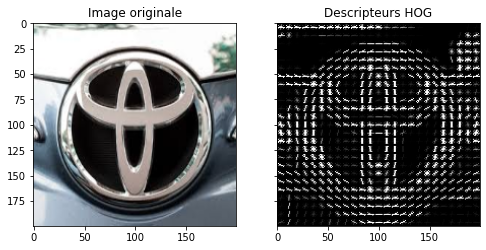

['toyota']


In [24]:
dir_test_1 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Test/mercedes/mrc93.jpg"
dir_test_1 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Test/hyundai/hnd10.jpg"
dir_test_1 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Test/mazda/mazda10.jpg"
dir_test_1 = "C:/Users/Hp/Desktop/fst ML/projet/archive/Car_Brand_Logos/Test/toyota_/toyota10.jpg"

img_test_1 = cv2.imread(dir_test_1)

resized_img_test_1 = cv2.resize(img_test_1, (200, 200))
gray_test_1 = cv2.cvtColor(resized_img_test_1, cv2.COLOR_BGR2GRAY)

fd_test_1, hog_image = hog(gray_test_1, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True, multichannel=False)

fd_test_1 = fd_test_1.reshape(1,-1)
print(fd_test_1.shape)

import matplotlib.pyplot as plt
from skimage import exposure

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.imshow(resized_img_test_1, cmap=plt.cm.gray)
ax1.set_title('Image originale')
# Réajuster le contraste pour l'affichage de l'image HOG
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Descripteurs HOG')
plt.show()

y_pred_1 = best_estimator.predict(fd_test_1)
print(y_pred_1)
